In [4]:
import numpy as np

j=1
for j in np.arange(10)+1:
    txtHybe = rf"""
    
        <valve_protocol>StripFormamide big</valve_protocol>  
         <valve_protocol>Hybridize {j} big</valve_protocol>  
         
         """
    print(txtHybe)
    for i in np.arange(10)+1:
    
        txt = rf""" 
        <change_directory>S:\12_16_2025_BigSlideTest\H{j}_MER_set{i}</change_directory> 
                  <loop name = "Position Loop Zscan{i}" increment = "name"><item name = "Conv{i}"></item></loop>"""
        print(txt)
    
    for i in np.arange(10)+1:
    
        txt = rf""" 
        
            
            <delay>2000</delay>
              <copy_directory>
                <source_path>S:\12_16_2025_BigSlideTest\H{j}_MER_set{i}</source_path>
                <target_path>U:\MERFISHp\12_16_2025_BigSlideTest\H{j}_MER_set{i}</target_path>
                <delete_source>True</delete_source>
              </copy_directory>	 
    
        
        
        """
        print(txt)    


    
        <valve_protocol>StripFormamide big</valve_protocol>  
         <valve_protocol>Hybridize 1 big</valve_protocol>  
         
         
 
        <change_directory>S:\12_16_2025_BigSlideTest\H1_MER_set1</change_directory> 
                  <loop name = "Position Loop Zscan1" increment = "name"><item name = "Conv1"></item></loop>
 
        <change_directory>S:\12_16_2025_BigSlideTest\H1_MER_set2</change_directory> 
                  <loop name = "Position Loop Zscan2" increment = "name"><item name = "Conv2"></item></loop>
 
        <change_directory>S:\12_16_2025_BigSlideTest\H1_MER_set3</change_directory> 
                  <loop name = "Position Loop Zscan3" increment = "name"><item name = "Conv3"></item></loop>
 
        <change_directory>S:\12_16_2025_BigSlideTest\H1_MER_set4</change_directory> 
                  <loop name = "Position Loop Zscan4" increment = "name"><item name = "Conv4"></item></loop>
 
        <change_directory>S:\12_16_2025_BigSlideTest\H1_MER_set5</

In [5]:
for i in np.arange(10)+1:
    txt = rf"""
    
    
    <item name = "Conv{i}">
      <movie>
        <name increment = "Yes">Conv_zscan{i}_</name>
                <overwrite>True</overwrite>
        <length>200</length>
        <parameters>60Xfaster</parameters>
    <check_focus><num_focus_checks>20</num_focus_checks><focus_scan/></check_focus>
        <variable_entry name = "Position Loop Zscan{i}"></variable_entry>
      </movie>
    </item>
    
        <loop_variable name = "Position Loop Zscan{i}">
       <file_path>pos_{i}.txt</file_path>
    </loop_variable>
    
    
    
    """
    print(txt)


    
    
    <item name = "Conv1">
      <movie>
        <name increment = "Yes">Conv_zscan1_</name>
                <overwrite>True</overwrite>
        <length>200</length>
        <parameters>60Xfaster</parameters>
    <check_focus><num_focus_checks>20</num_focus_checks><focus_scan/></check_focus>
        <variable_entry name = "Position Loop Zscan1"></variable_entry>
      </movie>
    </item>
    
        <loop_variable name = "Position Loop Zscan1">
       <file_path>pos_1.txt</file_path>
    </loop_variable>
    
    
    
    

    
    
    <item name = "Conv2">
      <movie>
        <name increment = "Yes">Conv_zscan2_</name>
                <overwrite>True</overwrite>
        <length>200</length>
        <parameters>60Xfaster</parameters>
    <check_focus><num_focus_checks>20</num_focus_checks><focus_scan/></check_focus>
        <variable_entry name = "Position Loop Zscan2"></variable_entry>
      </movie>
    </item>
    
        <loop_variable name = "Position Loop Zscan2

In [48]:
import os
from dask import array as da
import numpy as np
def read_im(fl,ncols=4):
    data = os.path.dirname(fl)+os.sep+os.path.basename(fl).split('_')[-1].split('.')[0]+r'\data'
    im = da.from_zarr(fl)#,component=data)
    im = im[:]
    im = im.reshape([-1,ncols,im.shape[-2],im.shape[-1]])
    im = im.swapaxes(0,1)
    im=im.astype(np.float32)
    im=im*im
    if ncols==5:
        im = da.array([im[1]+im[2],im[3],im[4],im[0]])
    return im.swapaxes(-1,-2)

import napari
V = napari.Viewer()
fl = r'U:\MERFISHp\12_16_2025_BigSlideTest\H3_MER_set9\Conv_zscan9__302.zarr'#??? need to close the quote, right?YAP
im1 = read_im(fl,ncols=5)
V.add_image(im1)

fl = r'U:\MERFISHp\12_16_2025_BigSlideTestV2\H3_MER_set9\Conv_zscan9__302.zarr'#??? need to close the quote, right?YAP
im1 = read_im(fl,ncols=5)
V.add_image(im1)

<Image layer 'im1 [1]' at 0x26685895220>

Cannot find steve


In [14]:
from ioMicro import get_pos
print(get_pos(fl))

(-3750.3, 9257.2)


In [23]:
new_pos = [-3743.20,10653.80]
new_pos = [-3743.20,10659.00]

old_pos = [-3750.3, 9257.2]
np.array(new_pos)-old_pos

array([   7.1, 1401.8])

In [27]:
import pickle
pickle.load(open(r'U:\MERFISHp\12_16_2025_BigSlideTest\mermake_fits\drift_Conv_zscan8__971--.pkl','rb'))

ModuleNotFoundError: No module named 'cupy'

In [31]:
array=np.array
float32=np.float32
drift = [(array([  -0.40730074,   -7.6482787 , -247.39148   ], dtype=float32), array([  0.4407839,   7.6627483, 247.36395  ], dtype=float32), array([  0.29667756,   7.6004715 , 247.48236   ], dtype=float32), 859, 260), (array([-5.6955321e-03, -5.7277455e+00, -1.4961369e+02], dtype=float32), array([5.4415122e-02, 5.7256866e+00, 1.4959787e+02], dtype=float32), array([-1.3776541e-01,  5.7338085e+00,  1.4966029e+02], dtype=float32), 904, 307), (array([   0.25986406,   -5.854038  , -100.37481   ], dtype=float32), array([ -0.22701764,   5.8359485 , 100.33549   ], dtype=float32), array([ -0.35611653,   5.907045  , 100.490036  ], dtype=float32), 926, 316), (array([ -1.1536313 ,   0.30584112, -39.13922   ], dtype=float32), array([ 1.1365784, -0.309047 , 39.17015  ], dtype=float32), array([ 1.2033253, -0.2964988, 39.049084 ], dtype=float32), 950, 326), (array([ -0.37440225,   0.28554416, -13.070571  ], dtype=float32), array([ 0.38389957, -0.30483082, 13.068852  ], dtype=float32), array([ 0.346711  , -0.22931004, 13.075584  ], dtype=float32), 1003, 344), (array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 1164, 380), (array([-1.8955607,  7.2822165, 25.08651  ], dtype=float32), array([  1.8601832,  -7.298197 , -25.088167 ], dtype=float32), array([  2.0046518,  -7.2329397, -25.081398 ], dtype=float32), 885, 287), (array([-0.8632525,  4.514345 , 32.01135  ], dtype=float32), array([  0.8340554,  -4.4986467, -32.008793 ], dtype=float32), array([  0.9733897,  -4.5735617, -32.020996 ], dtype=float32), 977, 259), (array([-2.101217,  4.153763, 37.249226], dtype=float32), array([  2.0269468,  -4.1627665, -37.24225  ], dtype=float32), array([  2.3810396,  -4.119839 , -37.275513 ], dtype=float32), 908, 241), (array([-2.5168586,  9.483776 , 53.011127 ], dtype=float32), array([  2.4498248,  -9.49515  , -53.009922 ], dtype=float32), array([  2.7344608,  -9.446857 , -53.01504  ], dtype=float32), 844, 260)]

In [38]:
drft = np.array([e[0]for e in drift])
np.round((drft-drft[1])*0.1083333)

array([[ -0.,  -0., -11.],
       [  0.,   0.,   0.],
       [  0.,  -0.,   5.],
       [ -0.,   1.,  12.],
       [ -0.,   1.,  15.],
       [  0.,   1.,  16.],
       [ -0.,   1.,  19.],
       [ -0.,   1.,  20.],
       [ -0.,   1.,  20.],
       [ -0.,   2.,  22.]], dtype=float32)

In [39]:
dic_trans={'H2_MER':[   7.1, 1396.6],
           'H3_MER':[   7.1, 1396.6+5],
           'H4_MER':[   7.1, 1396.6+12],
           'H5_MER':[   7.1, 1396.6+15],
           'H6_MER':[   7.1, 1396.6+16],
           'H7_MER':[   7.1, 1396.6+19]}

In [15]:
import glob
fls = glob.glob(r'S:\12_16_2025_BigSlideTest\test\movie_0003.zarr\*')
1/np.mean(np.diff(np.sort([os.path.getctime(fl) for fl in fls])))

np.float64(39.908555964230516)

In [215]:
fls_all = np.sort(glob.glob(r'S:\12_16_2025_BigSlideTest\H*_MER_set*\*.zarr'))
len(fls_all)

5367

In [229]:
fls = np.sort(glob.glob(r'S:\12_16_2025_BigSlideTest\H10_MER_set5\*.zarr'))
fls_old =  [np.sort(glob.glob(rf'U:\MERFISHp\12_16_2025_BigSlideTest\H{i}_MER_set5\*.zarr'))
           for i in np.arange(10)+1]
len(fls)

308

In [230]:
ifov=151
im1 = read_im(fls[ifov],ncols=5)

import napari
V = napari.Viewer()

for fls_ in fls_old:
    if len(fls_):
        fl = fls_[ifov]
        im2 = read_im(fl,ncols=5)
        V.add_image(im2)
V.add_image(im1)

<Image layer 'im1' at 0x1b881a7cbe0>

In [233]:
im2 = read_im(r'S:\12_16_2025_BigSlideTest\R10_MER_set1\Conv_zscan1__005.zarr',ncols=5)
im1 = read_im(r'U:\MERFISHp\12_16_2025_BigSlideTest\H10_MER_set1\Conv_zscan1__005.zarr',ncols=5)
import napari
V = napari.Viewer()
V.add_image(im2)
V.add_image(im1)

<Image layer 'im1' at 0x1b8cca6a8e0>

In [262]:
fls_mos = glob.glob(r'U:\MERFISHp\12_16_2025_BigSlideTest\mosaics\H*_MER_set8_col2_annot.png')

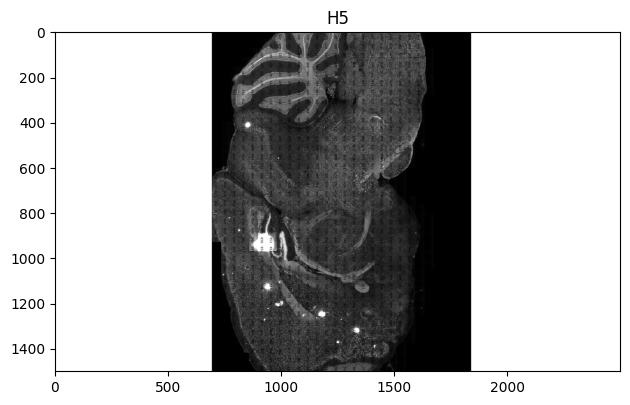

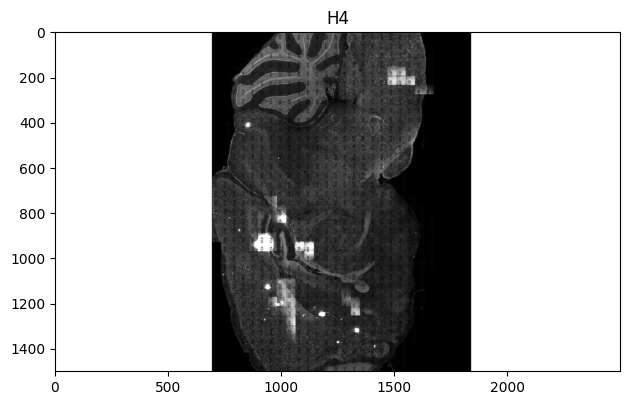

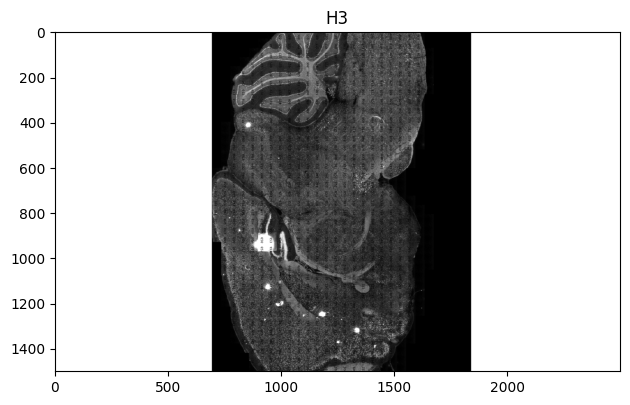

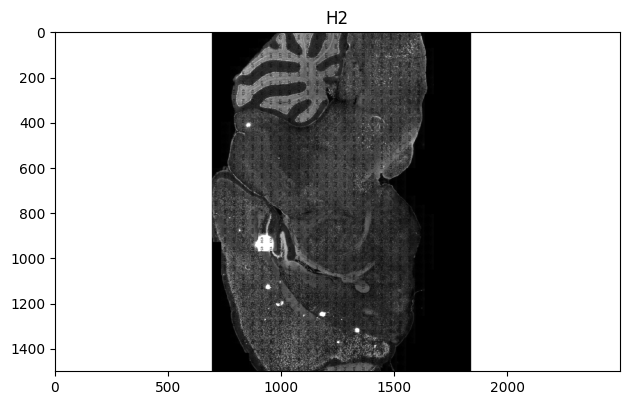

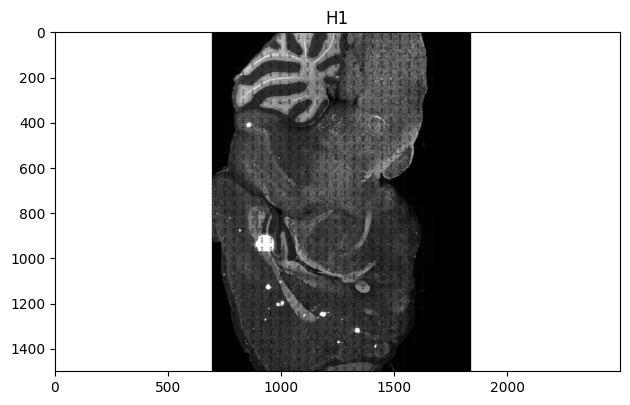

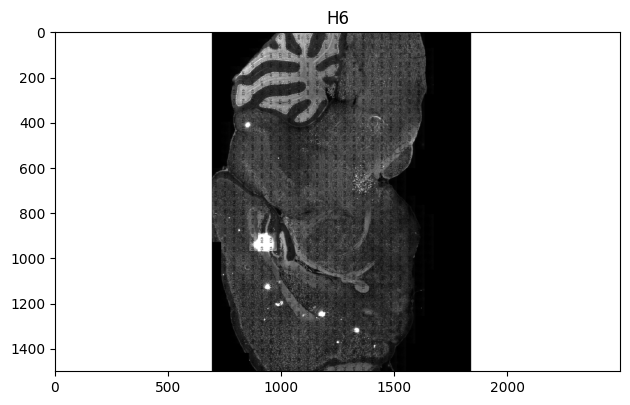

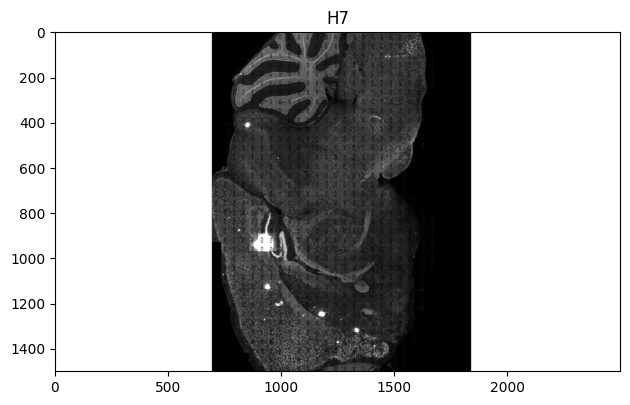

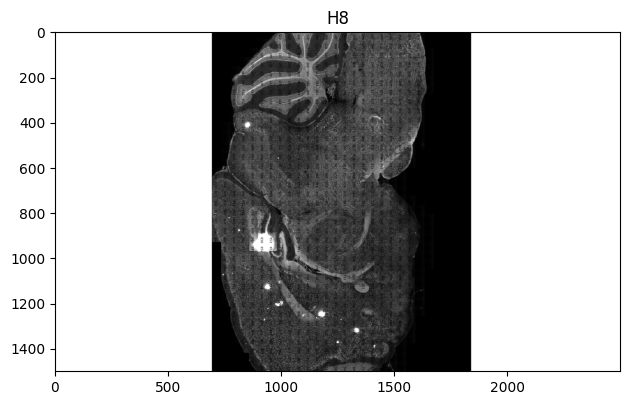

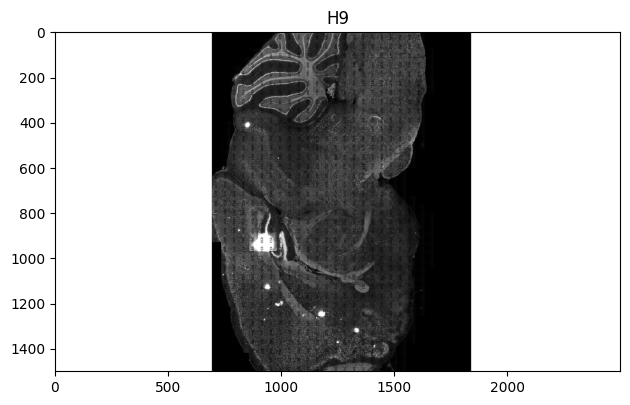

In [263]:
import cv2
for fl in fls_mos:
    im = cv2.imread(fl)
    tag = os.path.basename(fl).split('_')[0]
    import matplotlib.pylab as plt
    plt.imshow(im[:,:,0].T[750:2250,250:2750],cmap='gray')
    plt.tight_layout()
    plt.title(tag)
    plt.show()

In [206]:
flsT = glob.glob(r'U:\MERFISHp\12_16_2025_BigSlideTest\H3_MER_set*\*.zarr')
import time
start,lens = time.time(),len(flsT)
len(flsT)

4964

In [205]:
fls = glob.glob(r'S:\12_16_2025_BigSlideTest\H3_MER_set*\*.zarr')
len(fls)

4804

In [204]:
napari.view_image(read_im(fls[-1],ncols=5))

Viewer(camera=Camera(center=(0.0, np.float64(1399.5), np.float64(1399.5)), zoom=np.float64(0.1883035714285714), angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(np.float64(1.0), np.float64(19.0), 0.0, 0.0), scaled=True, style=<CursorStyle.STANDARD: 'standard'>, size=1.0), dims=Dims(ndim=4, ndisplay=2, order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3'), rollable=(True, True, True, True), range=(RangeTuple(start=np.float64(0.0), stop=np.float64(3.0), step=np.float64(1.0)), RangeTuple(start=np.float64(0.0), stop=np.float64(39.0), step=np.float64(1.0)), RangeTuple(start=np.float64(0.0), stop=np.float64(2799.0), step=np.float64(1.0)), RangeTuple(start=np.float64(0.0), stop=np.float64(2799.0), step=np.float64(1.0))), margin_left=(0.0, 0.0, 0.0, 0.0), margin_right=(0.0, 0.0, 0.0, 0.0), point=(np.float64(1.0), np.float64(19.0), np.float64(1399.0), np.float64(1399.0)), last_used=0), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), la

Cannot find steve


In [181]:
flsT = glob.glob(r'U:\MERFISHp\12_16_2025_BigSlideTest\H2_MER_set*\*.zarr')
import time
end,lensf = time.time(),len(flsT)
len(flsT)

6302

In [179]:
(end-start)/(lensf-lens)*6300/3600,lensf

(8.543768401187947, 6102)

In [114]:
(os.path.getctime(flsT[10])-os.path.getmtime(flsT[10]))/3600
timesTr = [os.path.getmtime(fl) for fl in flsT]

In [122]:
#np.median(np.diff(np.sort(timesTr)))*6300/3600

In [104]:
6302/1027*1.33

8.16130477117819

In [160]:
fls = np.sort(glob.glob(r'S:\12_16_2025_BigSlideTest\H2_MER_set*\*.zarr'))
time_per_fov = np.mean(np.diff(np.sort([os.path.getctime(fl) for fl in fls])))
len(fls),time_per_fov

(2235, np.float64(7.249294360834462))

In [163]:
8*6

48

In [72]:
os.path.getsize(fl)

40960

In [176]:
fls = np.sort(glob.glob(r'S:\12_16_2025_BigSlideTest\H2_MER_set10\*.zarr'))
len(fls)

560

In [227]:

fls = np.sort(glob.glob(r'U:\MERFISHp\12_16_2025_BigSlideTest\H9_MER_set*\*.zarr'))
len(fls)

4151

In [177]:
fl = fls[227]
im1 = read_im(fl,ncols=5)
import napari
V = napari.view_image(im1)


Cannot find steve


5040

In [ ]:
Takes 2.25 s between fovs+extra timeloss

In [47]:
time_per_fov*6300/3600

np.float64(12.785935934505536)

In [ ]:
13h image aquisition time.

In [ ]:
### Calculate fluidics time

In [3]:
protocol = """

    <protocol name = "StripFormamide big">
           <valve duration = "5">Set forma</valve>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			
			<pump duration = "400">Flow 1mL</pump>
			<pump duration = "400">Flow 1mL</pump>
			<pump duration = "400">Flow 1mL</pump>
			<pump duration = "400">Flow 1mL</pump>
			<pump duration = "400">Flow 1mL</pump>
			
			<valve duration = "5">Set SSC</valve>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
			<pump duration = "200">Flow 1mL</pump>
	 </protocol>

"""

In [4]:

time = 0
for ln in protocol.split('\n'):
    if 'duration' in ln:
        time+=int(ln.split('duration = "')[-1].split('"')[0])
print("Stripping time (h):",time/3600)

Stripping time (h): 1.3916666666666666


In [9]:
-137.00,999.00-2423.00

(-137.0, -1424.0)

In [8]:
import numpy as np
for p in np.arange(30)+1:
    txt = rf"""

   
			
            <protocol name = "Hybridize {p} big">
                <valve duration = "5">Set Hyb {p}</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "2840">Flow 1mL</pump>
				
                <valve duration = "5">Set Wash</valve>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				
				                
                 <valve duration = "5">Set Readout</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "2840">Flow 1mL</pump>
				
                <valve duration = "5">Set Wash</valve>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>

                <valve duration = "5">Set SSC</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                
                <valve duration = "5">Set Image</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "500">Flow 1mL</pump>

            </protocol>			
			

            """
    print(txt)



   
			
            <protocol name = "Hybridize 1 big">
                <valve duration = "5">Set Hyb 1</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "2840">Flow 1mL</pump>
				
                <valve duration = "5">Set Wash</valve>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				
				                
                 <valve duration = "5">Set Readout</valve>
                <pump duration = "300">Flow 1mL</pump>

In [5]:
protocol = """

   
			
            <protocol name = "Hybridize 11 big">
                <valve duration = "5">Set Hyb 11</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "2840">Flow 1mL</pump>
				
                <valve duration = "5">Set Wash</valve>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				
				                
                 <valve duration = "5">Set Readout</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "2840">Flow 1mL</pump>
				
                <valve duration = "5">Set Wash</valve>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>

                <valve duration = "5">Set SSC</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                
                <valve duration = "5">Set Image</valve>
                <pump duration = "300">Flow 1mL</pump>
                <pump duration = "300">Flow 1mL</pump>
				<pump duration = "300">Flow 1mL</pump>
                <pump duration = "500">Flow 1mL</pump>

            </protocol>			
			

"""

In [6]:
#time = 0
for ln in protocol.split('\n'):
    if 'duration' in ln:
        time+=int(ln.split('duration = "')[-1].split('"')[0])
print("Hybe time (h):",time/3600)

Hybe time (h): 6.033333333333333


In [ ]:
This should be optimized eventually but conservatively for this run:


In [ ]:
So roughly 13+9 h per run

In [39]:
13+9

22

So 1 hybe per day, total 10 days

that's twice as fast as I thought 
We are running faster the aqusition and ultimately we should optimize the hybe but it is faster than ranning 10X the previous hybe time.
Thank you! I think we are good to go!

ok, I think I am leaving town on Thursday, so I might check in before that. also let me know if anything else comes up

Coool! Thanks so much;)
Happy New Year
You too! Have fun!